# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [3]:
grade = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [4]:
type(grade)

pandas.core.frame.DataFrame

In [5]:
grade.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [7]:
grade["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [8]:
grade.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

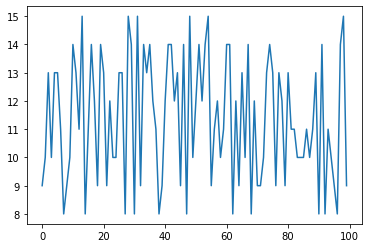

In [9]:
grade.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

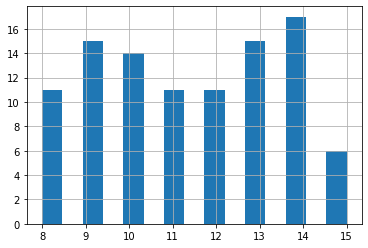

In [11]:
grade.國文.hist(bins = 15)

## 3 一些基本的資料分析

算平均。

In [12]:
grade.國文.mean()

11.39

算標準差。

In [13]:
grade.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [14]:
grade.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [15]:
grade.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [16]:
grade.國文.corr(grade.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [37]:
grade["總級分"] = grade.sum(axis = 1)
grade.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,269,49
1,胡玉華,10,10,10,8,9,221,40
2,黃淑婷,13,15,8,11,14,271,44
3,陳上紫,10,10,8,9,14,225,36
4,崔靜成,13,12,14,12,13,298,53


### 【技巧】

有計算的當然也可以的。

In [38]:
grade["加權"] = grade.國文 + grade.英文 + grade.數學 * 2

In [39]:
grade.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,269,49
1,胡玉華,10,10,10,8,9,221,40
2,黃淑婷,13,15,8,11,14,271,44
3,陳上紫,10,10,8,9,14,225,36
4,崔靜成,13,12,14,12,13,298,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [21]:
grade.sort_values(by = "總級分", ascending = False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
64,俞志峰,9,14,13,14,15,65,49
83,李士賢,10,14,15,13,13,65,54
87,趙偉希,10,13,14,13,15,65,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [40]:
grade_1 = grade.sort_values(by = ["加權", "總級分"], ascending = False)

### 【重點】重設 index

In [41]:
grade_1.index = range(1, 101)
grade_1.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,293,58
2,胡淳茜,12,15,14,13,11,305,55
3,詹威德,12,13,15,10,14,302,55
4,蔡亦瑄,13,13,14,13,12,303,54
5,李士賢,10,14,15,13,13,303,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [35]:
grade_1[grade_1.數學 == 15]

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
3,詹威德,12,13,15,10,14,55
5,李士賢,10,14,15,13,13,54
7,曾怡君,11,12,15,13,14,53
10,林哲法,14,9,15,10,14,53
13,陳竹伯,10,12,15,10,14,52
15,葉儀依,9,13,15,8,14,52
18,周育霖,9,12,15,13,12,51
21,張雅彬,10,11,15,12,8,51
22,芮秋辛,11,10,15,10,8,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [28]:
grade_1[(grade_1.數學 == 15) & (grade_1.英文 == 15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [31]:
grade_1.drop("總級分", axis = 1)
grade_1

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [42]:
grade_1.drop("總級分", axis = 1, inplace = True)
grade_1

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [43]:
grade_1

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [45]:
grade_1.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [46]:
grade_1

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [47]:
grade_1.drop(grade_1[grade_1.姓名 == "李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [51]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [52]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-15,27.385000,27.020000,27.035000,27.370001,103472800.0,25.668697
2016-08-16,27.557501,27.302500,27.407499,27.344999,135177600.0,25.645245
2016-08-17,27.342501,27.084999,27.275000,27.305000,101424000.0,25.607737
2016-08-18,27.400000,27.254999,27.307501,27.270000,87938800.0,25.574909
2016-08-19,27.422501,27.090000,27.192499,27.340000,101472400.0,25.640558


#### 只要最後 300 個交易日!

In [53]:
df = df[-300:]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-08,83.400002,81.830002,82.562500,83.364998,95654400.0,82.683151
2020-06-09,86.402496,83.002502,83.035004,85.997498,147712400.0,85.294128
2020-06-10,88.692497,86.522499,86.974998,88.209999,166651600.0,87.488533
2020-06-11,87.764999,83.870003,87.327499,83.974998,201662400.0,83.288170
2020-06-12,86.949997,83.555000,86.180000,84.699997,200146000.0,84.007233
...,...,...,...,...,...,...
2021-08-09,146.699997,145.520004,146.199997,146.089996,48908700.0,146.089996
2021-08-10,147.710007,145.300003,146.440002,145.600006,69023100.0,145.600006
2021-08-11,146.720001,145.529999,146.050003,145.860001,48493500.0,145.860001


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

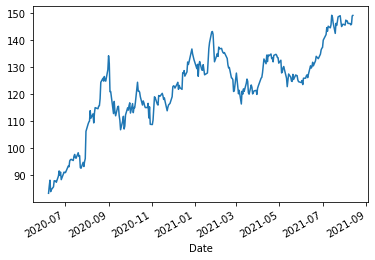

In [54]:
df.Close.plot()

<AxesSubplot:xlabel='Date'>

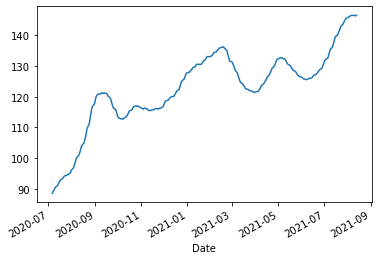

In [55]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

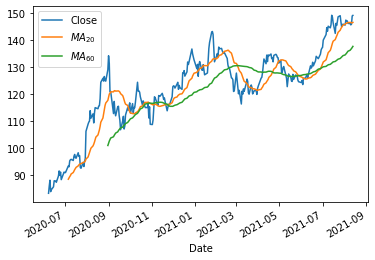

In [56]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [57]:
close = df.Close.values
len(close)

300

In [59]:
x = close[:-1]
len(x)

299

In [60]:
y = close[1:]
len(y)

299

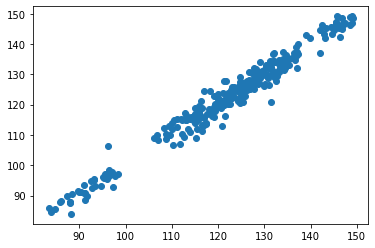

In [61]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [63]:
mydata = np.random.randn(4,3)

In [64]:
mydata

array([[ 0.25696869, -0.59564629,  0.28298996],
       [ 0.05916755,  0.37734815, -0.18028528],
       [-0.4818926 , -0.58404486,  0.98766431],
       [ 1.45235598, -0.19025737,  0.30012889]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [65]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [66]:
df2

,A,B,C
0,0.256969,-0.595646,0.282990
1,0.059168,0.377348,-0.180285
2,-0.481893,-0.584045,0.987664
3,1.452356,-0.190257,0.300129


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [67]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [68]:
df3

,A,B,C
0,0.875549,1.044563,0.886235
1,1.081721,1.317748,0.168040
2,-1.118492,1.215458,-0.382778


In [71]:
df4 = pd.concat([df2, df3], axis=0)

In [72]:
df4

,A,B,C
0,0.256969,-0.595646,0.282990
1,0.059168,0.377348,-0.180285
2,-0.481893,-0.584045,0.987664
3,1.452356,-0.190257,0.300129
0,0.875549,1.044563,0.886235
1,1.081721,1.317748,0.168040
2,-1.118492,1.215458,-0.382778


前面我們弄得亂七八糟的 index 重設一下。

In [73]:
df4.index = range(7)

In [74]:
df4

,A,B,C
0,0.256969,-0.595646,0.282990
1,0.059168,0.377348,-0.180285
2,-0.481893,-0.584045,0.987664
3,1.452356,-0.190257,0.300129
4,0.875549,1.044563,0.886235
5,1.081721,1.317748,0.168040
6,-1.118492,1.215458,-0.382778


#### 横向的貼

In [75]:
df5 = pd.concat([df2, df3], axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [76]:
df5

,A,B,C,A,B,C
0,0.256969,-0.595646,0.282990,0.875549,1.044563,0.886235
1,0.059168,0.377348,-0.180285,1.081721,1.317748,0.168040
2,-0.481893,-0.584045,0.987664,-1.118492,1.215458,-0.382778
3,1.452356,-0.190257,0.300129,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [100]:
df_name = pd.read_csv("data/names.csv", names=["姓名"])

In [101]:
df_name

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [111]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [112]:
df_grades.to_csv("data/grade2.csv", index=0)

In [113]:
df_grades = pd.read_csv("data/grade2.csv")
df_grades

,國文,英文,數學,社會,自然
0,7,11,7,13,11
1,7,10,13,11,15
2,13,9,11,9,15
3,9,10,8,12,13
4,9,11,6,12,7
...,...,...,...,...,...
95,9,15,12,15,12
96,11,8,8,8,12
97,13,6,9,7,14
98,15,11,15,15,13


In [114]:
df_x = pd.concat([df_name, df_grades], axis=1)

In [115]:
df_x

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,7,11,7,13,11
1,王紹尹,7,10,13,11,15
2,黃季坤,13,9,11,9,15
3,許正書,9,10,8,12,13
4,張鈞蓮,9,11,6,12,7
...,...,...,...,...,...,...
95,陳君生,9,15,12,15,12
96,曾桂甫,11,8,8,8,12
97,林欣怡,13,6,9,7,14
98,林佳霖,15,11,15,15,13
